# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [19]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

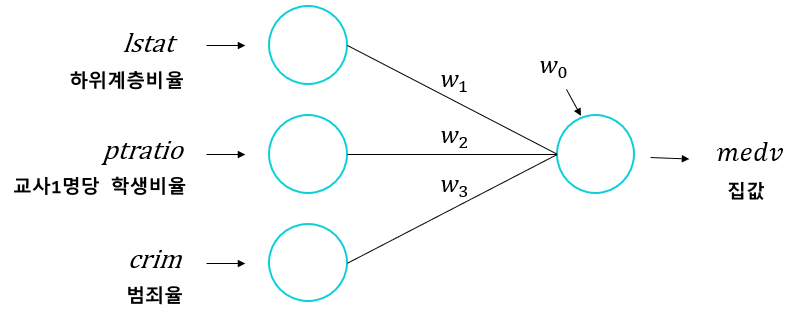

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [20]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [22]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [23]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [29]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential( Dense (1, input_shape = (nfeatures,)))

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [30]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [31]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2).history
# .history는 로그 따로 history 변수에 저장
# loss = train error, val_loss는 val error

Epoch 1/30
11/11 [==============================] - 1s 42ms/step - loss: 545.3467 - val_loss: 552.6619
Epoch 2/30
11/11 [==============================] - 0s 19ms/step - loss: 465.6862 - val_loss: 477.3297
Epoch 3/30
11/11 [==============================] - 0s 21ms/step - loss: 397.5327 - val_loss: 414.1592
Epoch 4/30
11/11 [==============================] - 0s 19ms/step - loss: 341.4366 - val_loss: 362.2730
Epoch 5/30
11/11 [==============================] - 0s 10ms/step - loss: 295.6653 - val_loss: 320.2834
Epoch 6/30
11/11 [==============================] - 0s 12ms/step - loss: 259.8902 - val_loss: 287.6798
Epoch 7/30
11/11 [==============================] - 0s 33ms/step - loss: 232.8150 - val_loss: 262.9120
Epoch 8/30
11/11 [==============================] - 0s 29ms/step - loss: 211.8459 - val_loss: 243.5096
Epoch 9/30
11/11 [==============================] - 0s 26ms/step - loss: 194.5377 - val_loss: 227.4140
Epoch 10/30
11/11 [==============================] - 0s 31ms/step - loss:

* 학습결과 그래프

In [32]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

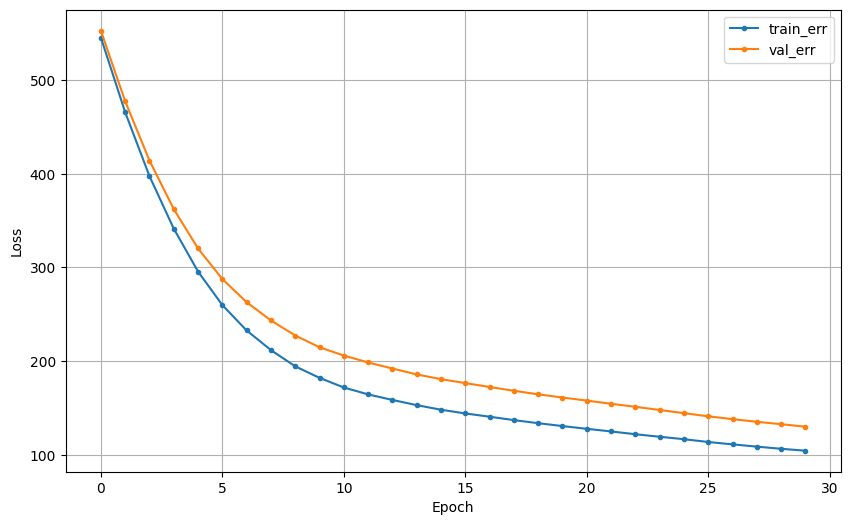

In [33]:
dl_history_plot(history)

### (3) 예측 및 검증

In [34]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [35]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 8.804593592994983
MAE  : 5.9052567612891105
MAPE : 0.3061088626547192


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [36]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [37]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [38]:
nfeatures = x_train.shape[1]
nfeatures

12

In [65]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential(Dense (1, input_shape = (nfeatures, )))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [66]:
model2.compile(optimizer=Adam(learning_rate=0.05), loss='mse')

* 학습

In [67]:
history = model2.fit(x_train, y_train, epochs=30, validation_split=.2).history

Epoch 1/30
11/11 [==============================] - 1s 19ms/step - loss: 526.7553 - val_loss: 518.5507
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 427.4431 - val_loss: 427.7024
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 348.1506 - val_loss: 356.5940
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 288.2382 - val_loss: 302.8849
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 244.0806 - val_loss: 262.9408
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 211.5517 - val_loss: 234.7933
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 189.5703 - val_loss: 214.8362
Epoch 8/30
11/11 [==============================] - 0s 6ms/step - loss: 173.5269 - val_loss: 200.1343
Epoch 9/30
11/11 [==============================] - 0s 6ms/step - loss: 162.0554 - val_loss: 188.8393
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 153.8657

s* 학습결과 그래프

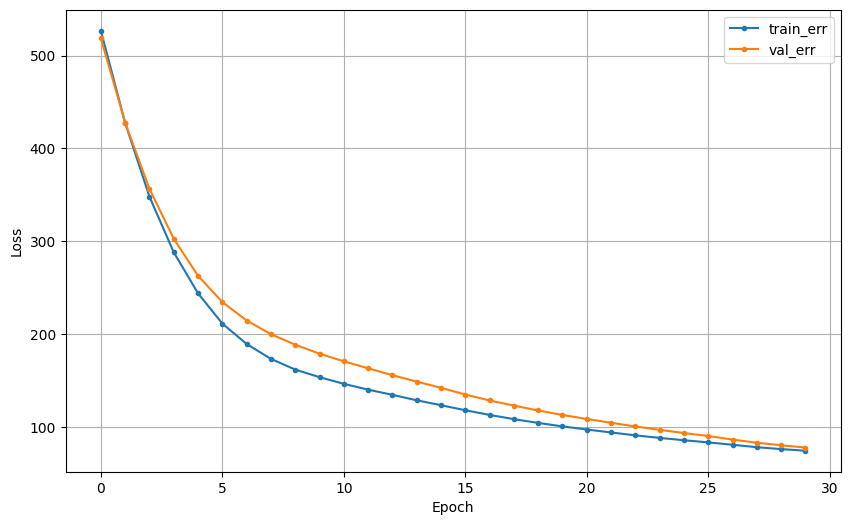

In [68]:
dl_history_plot(history)

* 예측 및 평가

In [69]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 7.480206250155007
MAE  : 5.238032197017296
MAPE : 0.27064079562788285


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [73]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [74]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [122]:
nfeatures = x_train.shape[1]
nfeatures

12

In [129]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential(Dense (1, input_shape = (nfeatures, )))

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [130]:
model2.compile(optimizer=Adam(learning_rate=0.08), loss='mse')

* 학습

In [131]:
history = model2.fit(x_train, y_train, epochs=200, validation_split=.2).history

Epoch 1/200
11/11 [==============================] - 1s 20ms/step - loss: 489.9944 - val_loss: 453.5368
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 351.7676 - val_loss: 335.8459
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 256.6621 - val_loss: 262.1564
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 203.2069 - val_loss: 221.4385
Epoch 5/200
11/11 [==============================] - 0s 8ms/step - loss: 173.9032 - val_loss: 197.7050
Epoch 6/200
11/11 [==============================] - 0s 9ms/step - loss: 158.0272 - val_loss: 181.9710
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 146.7773 - val_loss: 169.6005
Epoch 8/200
11/11 [==============================] - 0s 9ms/step - loss: 137.3385 - val_loss: 157.7904
Epoch 9/200
11/11 [==============================] - 0s 8ms/step - loss: 129.0986 - val_loss: 147.2461
Epoch 10/200
11/11 [==============================] - 0s 7ms/step - loss

* 학습결과 그래프

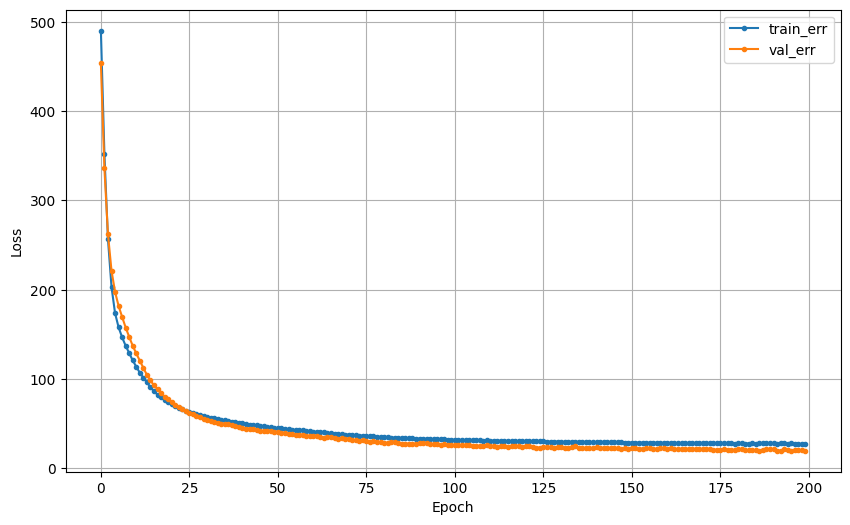

In [132]:
dl_history_plot(history)

* 예측 및 평가

In [133]:
pred2 = model2.predict(x_val)

print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 4ms/step
RMSE : 4.5559083287017295
MAE  : 3.589478242163566
MAPE : 0.19047473912499807


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [134]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [135]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(레이어 여러 개 입력은 리스트로)
model3 = Sequential([  Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                       Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile

In [136]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [137]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 [==============================] - 1s 31ms/step - loss: 438.8143 - val_loss: 202.7156
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 159.0669 - val_loss: 136.0178
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 104.3154 - val_loss: 92.9499
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 79.9327 - val_loss: 54.5084
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 62.1362 - val_loss: 52.7742
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 56.2725 - val_loss: 42.0246
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 50.5429 - val_loss: 40.1143
Epoch 8/50
11/11 [==============================] - 0s 8ms/step - loss: 46.4321 - val_loss: 35.9644
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 42.7423 - val_loss: 31.1643
Epoch 10/50
11/11 [==============================] - 0s 11ms/step - loss: 40.3413 - val_loss: 

* 학습결과 그래프

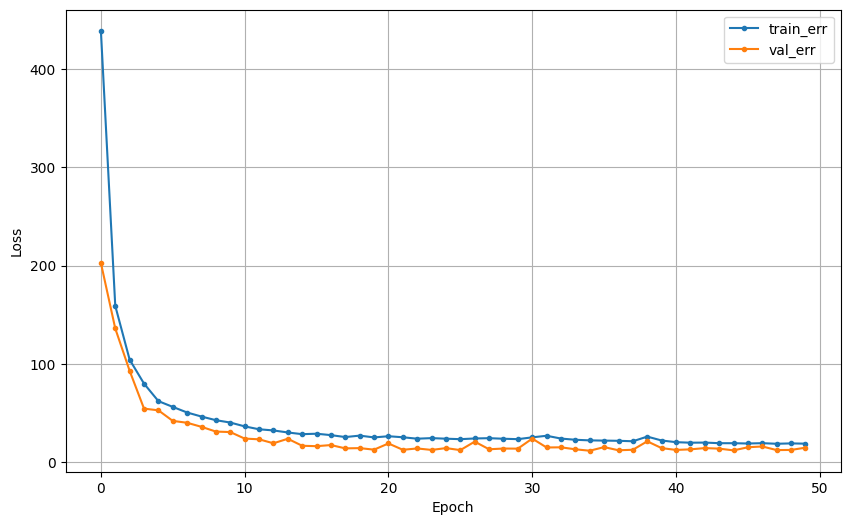

In [138]:
dl_history_plot(hist)

* 예측 및 평가

In [139]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 4.1652257013916145
MAE  : 3.0484143294540105
MAPE : 0.15402694089768595


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [218]:
# 메모리 정리
clear_session()

model = Sequential([
    Dense(8, input_shape=(nfeatures, ), activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [219]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [220]:
history = model.fit(x_train, y_train, epochs=30, validation_split=.2, verbose=0).history

* 학습곡선

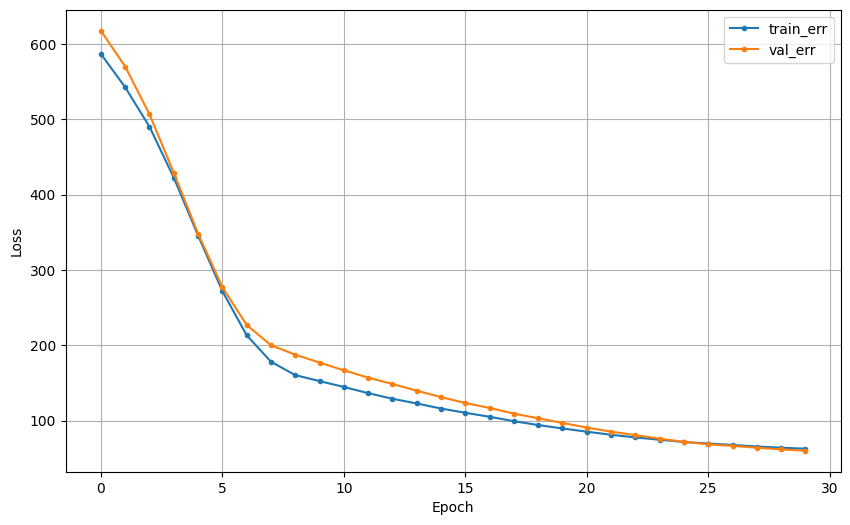

In [221]:
dl_history_plot(history)

* 검증

In [222]:
y_pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [223]:
print(mean_squared_error(y_val, y_pred, squared=False))
print(mean_absolute_error(y_val, y_pred))
print(mean_absolute_percentage_error(y_val, y_pred))

6.805124033268314
4.8609016044467115
0.24370366199531968


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [224]:
clear_session()

model = Sequential([
    Dense(8, input_shape = (nfeatures, ), activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 컴파일 + 학습

In [225]:
model.compile(optimizer=Adam(learning_rate=0.02), loss='mse')

In [226]:
history = model.fit(x_train, y_train, epochs=70, validation_split=.2, verbose=0).history

* 학습곡선

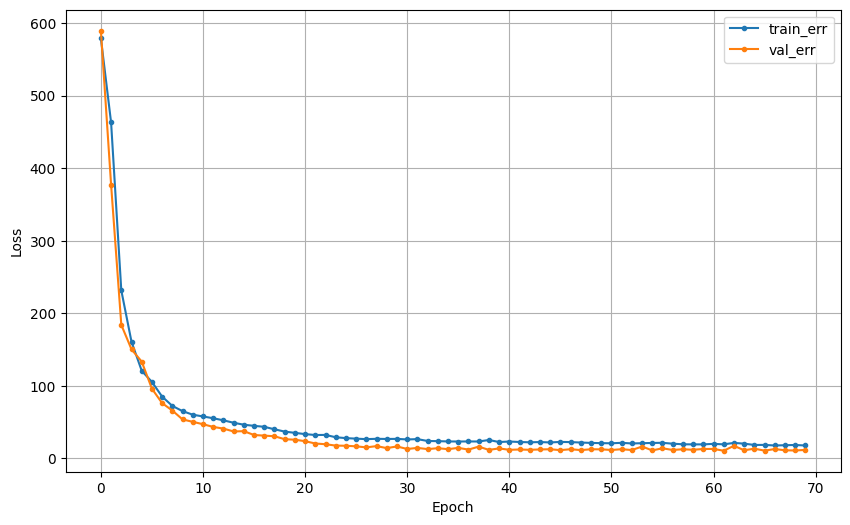

In [227]:
dl_history_plot(history)

* 검증

In [228]:
print(mean_squared_error(y_val, y_pred, squared=False))
print(mean_absolute_error(y_val, y_pred))
print(mean_absolute_percentage_error(y_val, y_pred))

6.805124033268314
4.8609016044467115
0.24370366199531968


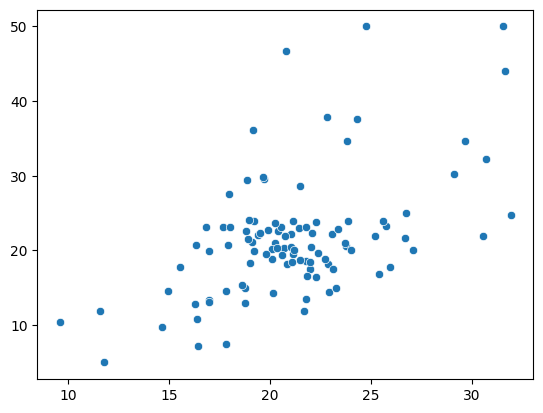

In [232]:
sns.scatterplot(x = y_pred.reshape(-1), y = y_val.values)
plt.show()

# .reshape(-1): 2차원 배열을 1차원으로
# 점들이 직선에 모일수록 정확한 것